In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt,seaborn as sns

In [2]:
df0=pd.read_csv(r"Marijuana_Arrests.csv")
df0.head()

,TYPE,ADULT_JUVENILE,YEAR,DATETIME,CCN,AGE,OFFENSE_DISTRICT,OFFENSE_PSA,OFFENSE_BLOCKX,OFFENSE_BLOCKY,...,ADDRESS,ARREST_BLOCKX,ARREST_BLOCKY,GIS_ID,CREATOR,CREATED,EDITOR,EDITED,OBJECTID,GLOBALID
0,Possession,Adult,2012,2012/01/01 06:00:00+00,b';\xc8k~\xa4iJ',20.0,5D,501.0,399700.0,137900.0,...,FLORIDA AVE NE,401400.0,136900.0,MARIJUANA_ARRESTS_1,JLAY,2022/10/18 21:51:23+00,JLAY,2022/10/18 21:51:23+00,12481,{4654D30A-5B56-4E19-8FC2-B19CC723C747}
1,Possession,Adult,2012,2012/01/01 06:00:00+00,b';\xc8k~\xa4iJ',23.0,5D,501.0,399700.0,137900.0,...,FLORIDA AVE NE,401400.0,136900.0,MARIJUANA_ARRESTS_2,JLAY,2022/10/18 21:51:23+00,JLAY,2022/10/18 21:51:23+00,12482,{1C0EBA86-27EC-4B8E-8ABB-6EFFF03A0AA2}
2,Possession,Adult,2012,2012/01/01 06:00:00+00,b't6\xa0\xac\xec`\xa4',46.0,7D,707.0,399700.0,130600.0,...,3300 BLOCK OF BROTHERS PL SE,399700.0,130600.0,MARIJUANA_ARRESTS_3,JLAY,2022/10/18 21:51:23+00,JLAY,2022/10/18 21:51:23+00,12483,{88080D68-CFA3-41E6-AA69-5DB7F950A134}
3,Possession,Adult,2012,2012/01/01 09:35:00+00,b'\xbe\x1d\xa7\xf5\xffWx',30.0,6D,605.0,403300.0,134500.0,...,700 BLOCK OF 32ND ST SE,NaN,NaN,MARIJUANA_ARRESTS_4,JLAY,2022/10/18 21:51:23+00,JLAY,2022/10/18 21:51:23+00,12484,{7769980A-5F36-4B3C-91CF-D1A3A94CE52E}
4,Possession with intent to distribute,Adult,2012,2012/01/02 19:40:00+00,b'\xbb\xc0\x8e\x94\x81\xac\xcd',29.0,6D,604.0,406400.0,135300.0,...,5300 BLOCK OF B ST SE,NaN,NaN,MARIJUANA_ARRESTS_5,JLAY,2022/10/18 21:51:23+00,JLAY,2022/10/18 21:51:23+00,12485,{5D5BEE85-DF16-41A1-BB49-0D16D0EE1320}


In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13063 entries, 0 to 13062
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TYPE                13063 non-null  object 
 1   ADULT_JUVENILE      13063 non-null  object 
 2   YEAR                13063 non-null  int64  
 3   DATETIME            13063 non-null  object 
 4   CCN                 12510 non-null  object 
 5   AGE                 12466 non-null  float64
 6   OFFENSE_DISTRICT    13063 non-null  object 
 7   OFFENSE_PSA         13036 non-null  float64
 8   OFFENSE_BLOCKX      12461 non-null  float64
 9   OFFENSE_BLOCKY      12461 non-null  float64
 10  DEFENDANT_PSA       12328 non-null  object 
 11  DEFENDANT_DISTRICT  12363 non-null  object 
 12  RACE                12510 non-null  object 
 13  ETHNICITY           12510 non-null  object 
 14  SEX                 12510 non-null  object 
 15  CATEGORY            13063 non-null  object 
 16  DESC

In [4]:
df0.drop(columns=(["GLOBALID","GIS_ID","OBJECTID","CATEGORY","DEFENDANT_PSA","DEFENDANT_DISTRICT","CREATOR","CREATED","EDITOR","EDITED"]),inplace=True)

In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13063 entries, 0 to 13062
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TYPE              13063 non-null  object 
 1   ADULT_JUVENILE    13063 non-null  object 
 2   YEAR              13063 non-null  int64  
 3   DATETIME          13063 non-null  object 
 4   CCN               12510 non-null  object 
 5   AGE               12466 non-null  float64
 6   OFFENSE_DISTRICT  13063 non-null  object 
 7   OFFENSE_PSA       13036 non-null  float64
 8   OFFENSE_BLOCKX    12461 non-null  float64
 9   OFFENSE_BLOCKY    12461 non-null  float64
 10  RACE              12510 non-null  object 
 11  ETHNICITY         12510 non-null  object 
 12  SEX               12510 non-null  object 
 13  DESCRIPTION       13063 non-null  object 
 14  ADDRESS           12481 non-null  object 
 15  ARREST_BLOCKX     12093 non-null  float64
 16  ARREST_BLOCKY     12093 non-null  float6

In [6]:
df0["DATETIME"] = pd.to_datetime(df0.DATETIME)

In [7]:
df0["TYPE"] = df0.TYPE.astype("category")

In [8]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13063 entries, 0 to 13062
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   TYPE              13063 non-null  category           
 1   ADULT_JUVENILE    13063 non-null  object             
 2   YEAR              13063 non-null  int64              
 3   DATETIME          13063 non-null  datetime64[ns, UTC]
 4   CCN               12510 non-null  object             
 5   AGE               12466 non-null  float64            
 6   OFFENSE_DISTRICT  13063 non-null  object             
 7   OFFENSE_PSA       13036 non-null  float64            
 8   OFFENSE_BLOCKX    12461 non-null  float64            
 9   OFFENSE_BLOCKY    12461 non-null  float64            
 10  RACE              12510 non-null  object             
 11  ETHNICITY         12510 non-null  object             
 12  SEX               12510 non-null  object             
 13  D

In [9]:
df0.shape

(13063, 17)

In [10]:
100*(df0.isnull().sum()/len(df0.index))

TYPE                0.000000
ADULT_JUVENILE      0.000000
YEAR                0.000000
DATETIME            0.000000
CCN                 4.233331
AGE                 4.570160
OFFENSE_DISTRICT    0.000000
OFFENSE_PSA         0.206691
OFFENSE_BLOCKX      4.608436
OFFENSE_BLOCKY      4.608436
RACE                4.233331
ETHNICITY           4.233331
SEX                 4.233331
DESCRIPTION         0.000000
ADDRESS             4.455332
ARREST_BLOCKX       7.425553
ARREST_BLOCKY       7.425553
dtype: float64

In [11]:
df0 = df0[~(df0.isnull().sum(axis=1)>5)]

In [12]:
df0.shape

(12509, 17)

In [13]:
100*(df0.isnull().sum()/len(df0.index))

TYPE                0.000000
ADULT_JUVENILE      0.000000
YEAR                0.000000
DATETIME            0.000000
CCN                 0.000000
AGE                 0.343752
OFFENSE_DISTRICT    0.000000
OFFENSE_PSA         0.175873
OFFENSE_BLOCKX      0.383724
OFFENSE_BLOCKY      0.383724
RACE                0.000000
ETHNICITY           0.000000
SEX                 0.000000
DESCRIPTION         0.000000
ADDRESS             0.223839
ARREST_BLOCKX       3.325606
ARREST_BLOCKY       3.325606
dtype: float64

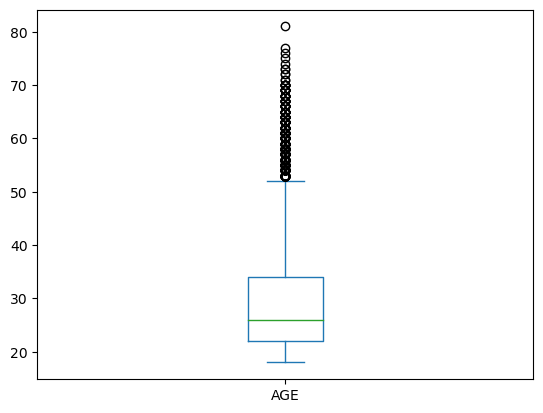

In [14]:
df0.AGE.plot.box()
plt.show()

In [15]:
df0 = df0[~(df0["AGE"]>80)]

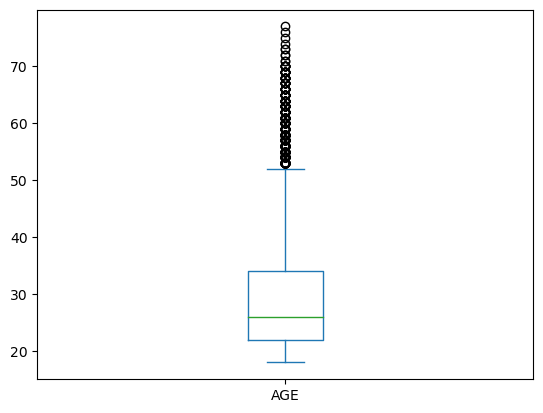

In [16]:
df0.AGE.plot.box()
plt.show()

In [17]:
df0["Age_range"] = pd.cut(df0["AGE"],bins=[0,21,41,61,100],labels=["<20","20-40","40-60","60+"])

In [18]:
df0["Age_range"] = df0["Age_range"].astype("category")

In [19]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12508 entries, 0 to 13033
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   TYPE              12508 non-null  category           
 1   ADULT_JUVENILE    12508 non-null  object             
 2   YEAR              12508 non-null  int64              
 3   DATETIME          12508 non-null  datetime64[ns, UTC]
 4   CCN               12508 non-null  object             
 5   AGE               12465 non-null  float64            
 6   OFFENSE_DISTRICT  12508 non-null  object             
 7   OFFENSE_PSA       12486 non-null  float64            
 8   OFFENSE_BLOCKX    12460 non-null  float64            
 9   OFFENSE_BLOCKY    12460 non-null  float64            
 10  RACE              12508 non-null  object             
 11  ETHNICITY         12508 non-null  object             
 12  SEX               12508 non-null  object             
 13  D

In [20]:
df0["ETHNICITY"].unique()

array(['N ', 'U ', 'H ', 'N', 'U', 'H'], dtype=object)

In [21]:
df0["ETHNICITY"] = df0["ETHNICITY"].apply(lambda x: x.split(" ")[0])

In [22]:
df0["ETHNICITY"].unique()

array(['N', 'U', 'H'], dtype=object)

In [23]:
df0["RACE"].unique()

array(['B ', 'U', 'W ', 'A ', 'B', 'W', 'A', 'P'], dtype=object)

In [24]:
df0["RACE"] = df0["RACE"].apply(lambda x: x.split(" ")[0])

In [25]:
df0["RACE"].unique()

array(['B', 'U', 'W', 'A', 'P'], dtype=object)

In [37]:
df0["RACE"] = df0["RACE"].apply(lambda x: np.nan if x=="U" else x)

In [38]:
df0["ETHNICITY"] = df0["ETHNICITY"].apply(lambda x: np.nan if x=="U" else x)

In [47]:
df0["ADULT_JUVENILE"] = df0["ADULT_JUVENILE"].apply(lambda x: np.nan if x=="Unknown" else x)

In [58]:
df0.shape

(12508, 18)

In [60]:
df0 = df0[~(df0.isnull().sum(axis=1)>=5)]

In [61]:
df0.shape

(12492, 18)

In [76]:
df0["Month"] = pd.to_datetime(df0["DATETIME"]).dt.month_name()

C:\Users\Manoj Raj S\AppData\Local\Temp\ipykernel_10380\930752012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0["Month"] = pd.to_datetime(df0["DATETIME"]).dt.month_name()


In [84]:
df0.head()

,TYPE,ADULT_JUVENILE,YEAR,DATETIME,CCN,AGE,OFFENSE_DISTRICT,OFFENSE_PSA,OFFENSE_BLOCKX,OFFENSE_BLOCKY,RACE,ETHNICITY,SEX,DESCRIPTION,ADDRESS,ARREST_BLOCKX,ARREST_BLOCKY,Age_range,Month
0,Possession,Adult,2012,2012-01-01 06:00:00+00:00,b';\xc8k~\xa4iJ',20.0,5D,501.0,399700.0,137900.0,B,N,F,Ucsa Possession Marijuana,FLORIDA AVE NE,401400.0,136900.0,<20,January
1,Possession,Adult,2012,2012-01-01 06:00:00+00:00,b';\xc8k~\xa4iJ',23.0,5D,501.0,399700.0,137900.0,B,N,M,Ucsa Possession Marijuana,FLORIDA AVE NE,401400.0,136900.0,20-40,January
2,Possession,Adult,2012,2012-01-01 06:00:00+00:00,b't6\xa0\xac\xec`\xa4',46.0,7D,707.0,399700.0,130600.0,B,N,M,Ucsa Possession Marijuana,3300 BLOCK OF BROTHERS PL SE,399700.0,130600.0,40-60,January
3,Possession,Adult,2012,2012-01-01 09:35:00+00:00,b'\xbe\x1d\xa7\xf5\xffWx',30.0,6D,605.0,403300.0,134500.0,B,NaN,M,Ucsa Possession Marijuana,700 BLOCK OF 32ND ST SE,NaN,NaN,20-40,January
4,Possession with intent to distribute,Adult,2012,2012-01-02 19:40:00+00:00,b'\xbb\xc0\x8e\x94\x81\xac\xcd',29.0,6D,604.0,406400.0,135300.0,NaN,NaN,M,Ucsa Pwid Marijuana,5300 BLOCK OF B ST SE,NaN,NaN,20-40,January


### Univariate Analysis

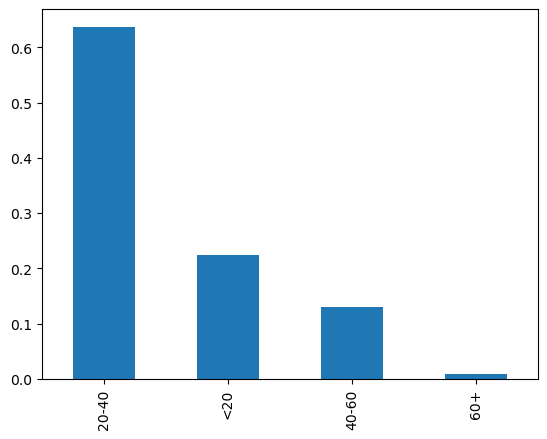

In [63]:
## Highest age group invovled in crime
df0.Age_range.value_counts(normalize=True).plot.bar()
plt.show()

#### more than 60% of people belong to 20-40 Age group

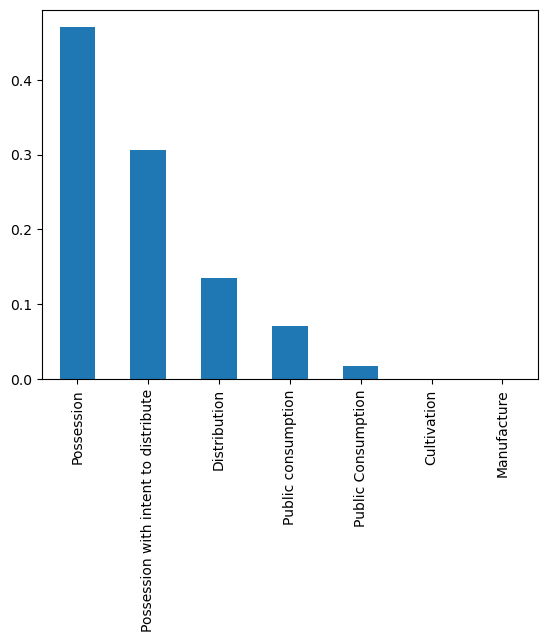

In [66]:
## Highest number of crime
df0.TYPE.value_counts(normalize=True).plot.bar()
plt.show()

#### Nearly 50% of people invovled in drug possession, 30% in possession & distribution

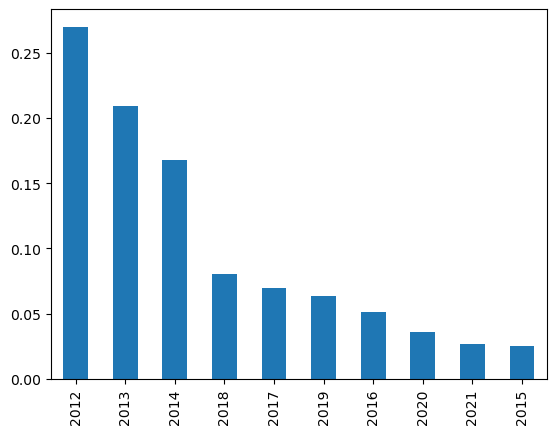

In [90]:
df0.YEAR.value_counts(normalize=True).plot.bar()
plt.show()

#### Majority of the cases got arrested on 2012,2013,2014

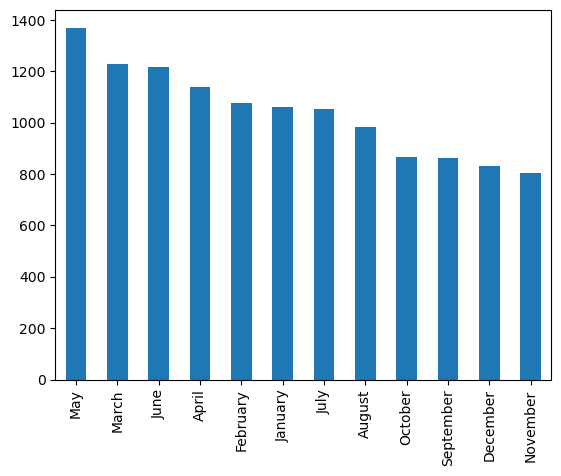

In [79]:
df0.Month.value_counts().plot.bar()
plt.show()

#### Drug arrests were usually high on first 3 quarters of the year compared to last

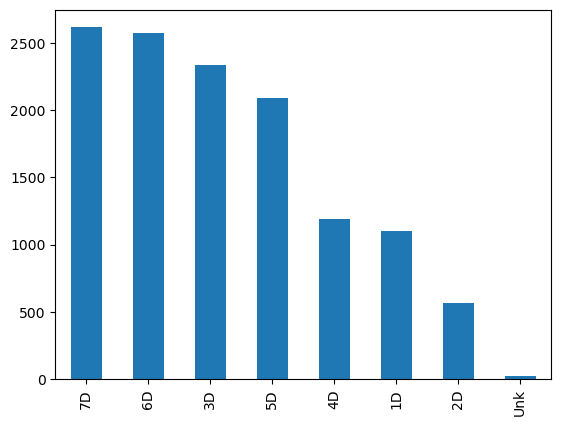

In [83]:
df0.OFFENSE_DISTRICT.value_counts().plot.bar()
plt.show()

#### Drug cases were majorly reported in 7D,6D,3D,5D districts

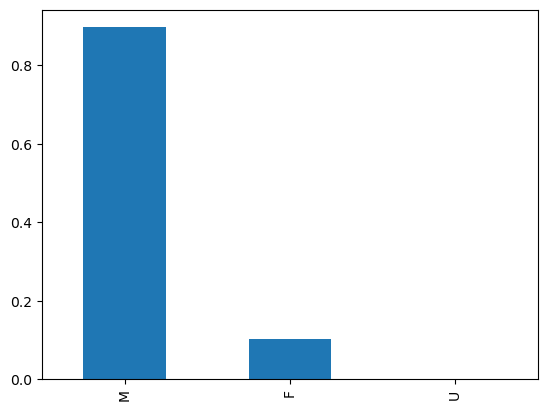

In [87]:
df0.SEX.value_counts(normalize=True).plot.bar()
plt.show()

#### Majority of the accused people are of Male compared to Female

In [96]:
df0["Hours"] = df0["DATETIME"].dt.hour

C:\Users\Manoj Raj S\AppData\Local\Temp\ipykernel_10380\1752919194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0["Hours"] = df0["DATETIME"].dt.hour


In [102]:
x = df0["Hours"].value_counts().sort_index()

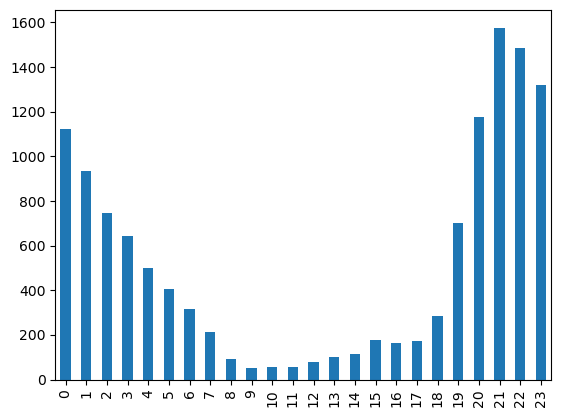

In [103]:
x.plot.bar()
plt.show()

#### Arrests across the day

### Bivariate Analysis

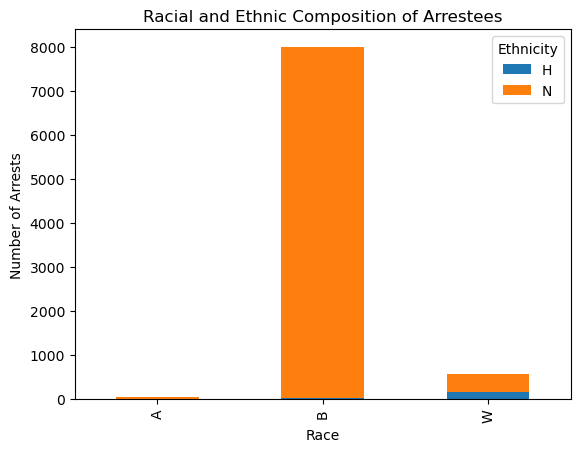

In [93]:
arrests_by_demographics = df0.groupby(['RACE', 'ETHNICITY']).size().unstack()
arrests_by_demographics.plot(kind='bar', stacked=True)
plt.xlabel('Race')
plt.ylabel('Number of Arrests')
plt.title('Racial and Ethnic Composition of Arrestees')
plt.legend(title='Ethnicity')
plt.show()